
## Linear Discriminant Analysis (Classification)



#### Othman Abdulrahman Al Homidi
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)

### Executive Summary

This workflow demonstrates another methodology in classification by initially utilizing linear discriminant analysis **(LDA)** for an existent subsurface data. LDA's approach are used generally for classification problems, and inherently has dimensionality reduction in its process. We'll be describing the approach mathematically and how it behaves prior modeling to get a better grasp of the general fundamentals and assumptions. The mechanism generates an axis which follows two main criteria being to maximize the projected distance between means and minimize the variation within each category. This will create the separation needed for classification. 

Additionally, we'll also demonstrate fall off of this method and touch a little upon Quadratic Discriminant Analysis **(QDA)** and how it differes from LDA in terms of applications.

Essentially, we'll learn that LDA works great with categories with equal covariance matrices, while if they're not equal QDA performs a lot better in classification problems.


(These techniques are widely used in image recognition and predictive analysis, and can be applied for subsurface classification cases) 


#### Main Question

The question I’d like to investigate is that are the groups of data different? If so, how would we able to discriminate between groups of labeled data? The opportunity available is to analyze dependent categorical data and be able to distinguish between sets of groups if new data. 

#### Linear Discriminant Analysis

The technique involves a dimensionality reduction approach which was touched upon briefly in PCA. But this time around rather than reducing dimensionality and generating PC, the supervised classification tool tries to find maximum separability between known categories while reducing dimensionality in the process.  

It's essentially a supervised learning classifier, developed originally by R. A. Fisher back in 1936 by utilizing robust mathematical approach for classification.

**Dimensionality Reduction**

* The exciting part of the approach is that it reduces dimensionality greatly if you're dealing with large predictor features with low labeled categories. This inherently will improve computing time, data storage and far easier to visualize.

**Supervised learning**

* A subcategory of ML that utilizes labeled datasets over training and testing datasets for classifications or predictions

**Math Overview**

1. Compute mean vectors $d$ for all classes involved in the data set (in our case is 2)
2. We need to calculate scatter matrices for:
* Separability between classes, which is the distance between mean of classes. (Between class variance $S_B$)
\begin{equation}
S_b = \sum \limits _{i=1} N_{ij} (\mu_i -\bar{\mu_j})(\mu_i- \bar{\mu_j})^T
\end{equation}
* Second, we calculate distance between mean and sample of each class (within class variance $S_W$)
\begin{equation}
S_W = S_1 + S_2
\end{equation}
\begin{equation}
S_i = \sum \limits _{i=1} ^{Nc} (x_i -\bar{\mu_i})(x_i- \bar{\mu_i})^T
\end{equation}

3. Compute Eigenvectors and Eigenvalues to find best LDA projection

\begin{equation}
S_W^{-1}S_Bv = \lambda v
\end{equation}
* where $v$ is projection vector and $\lambda$ is scalar equivalent to projection

4. Sort Eigenvectors by decreasing Eigenvalues, and select the largest Eigenvalue from corresponding Eigenvector

5. Finally, we project in a lower dimensional space, where we maximize between class variance and minimize within class variance by:
\begin{equation}
y = W^T X
\end{equation}
* Where $W^T$ is the projection vector, and $X$ are the sample data


**Assumptions**

1. That predictor features are not correlated 
2. The Data are standardized and normalized before modeling
3. That class conditional distribution are Gaussian 
4. Identical covariance matrices for every class
5. Homoskedasticity

#### Importing Packages

We start off by importing packages required for this workflow.

In [1]:
import os                                                         # Setting Working Diretory 
import numpy as np                                                # For computing Arrays and Matrixes
from numpy import mean, std                                       # For valdiating LDA scores
import pandas as pd                                               # DataFrames
import matplotlib.pyplot as plt                                   # For plotting
from matplotlib import colors                                     # To import color schemes
import seaborn as sns                                             # for data visualization
import sklearn                                                    # Our modual for ML
from sklearn.preprocessing import StandardScaler, LabelEncoder    # For preprocessing features before training
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold  # training and testing datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Importing LDA 
from sklearn.metrics import accuracy_score, confusion_matrix #For computing accuracy and performance of model
scaler = StandardScaler() # To remove mean and scales features to unit varaince

### Visualization Function

In this section, we defined the function that helps us visualize and demonstrate bivariate between two predictor features with the response feature in this case would be a classifier. 

The code block is used from Professor Michael Pyrcz (@GeostatsGuy), SubsurfaceDataAnalytics_SupportVectorMachines.ipynb from [GeostatsGuy GitHub]( https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_SupportVectorMachines.ipynb)

In [2]:
# This function helps us to visulaize our output in classification effectively, taking from Professor Michael Pyrcz 
def visualize_model(model,nxfeature,nyfeature,xfeature,yfeature,response):# plots the data points for LDA prediction 
    n_classes = 10
    cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})

    x_min, x_max = min(nxfeature), max(nxfeature) 
    y_min, y_max = min(nyfeature) , max(nyfeature) 
    plot_step = 1000
    resp_min = round(min(response)); resp_max = round(max(response));
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, plot_step),
                     np.linspace(y_min, y_max, plot_step))
    
    z_min = round(min(response)); z_max = round(max(response))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    trans = scaler.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
    trans_x = trans[:,0].reshape(xx.shape)
    trans_y = trans[:,1].reshape(xx.shape)
    cs = plt.contourf(trans_x, trans_y, Z, cmap=cmap,vmin=z_min, vmax=z_max)

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="black")
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(response.name, rotation=270, labelpad=20)
    return(plt)

### Getting started

In this project, I’ve utilized the file to carry on the LDA approach on:
```python
df = pd.read_csv("12_sample_data.csv")  
``` 
The data set has three main features, Porosity, Permeability and Acoustic Impedence each categorized with certain facies either 1 or 0. Where each feature represents the following:

* **Porosity** - Void fraction of the rock to its volume (fraction)
* **Permeability** - The rock's ability to allow for fluid flow (mD)
* **AI** - The product of density and speed of sound in a medium $kg/m^2s*10^3$

In [3]:
#df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv")
df = pd.read_csv("12_sample_data.csv")        
df.head(n=10)

,X,Y,Facies,Porosity,Perm,AI
0,50,900,1,0.220761,140.021266,3413.063944
1,50,850,1,0.237154,39.837129,3074.562617
2,50,800,1,0.234352,84.992437,2292.783358
3,50,750,1,0.244553,90.632307,2494.848885
4,50,700,1,0.231787,811.547979,2522.063995
5,50,650,1,0.233280,426.992456,3964.185956
6,50,550,1,0.234423,2398.406492,3318.885844
7,50,500,1,0.219657,1637.224971,3030.874323
8,50,450,1,0.200389,265.636019,3454.389302
9,50,350,0,0.165908,7.951511,5025.286221


Performing overall check in our data for any potential unphysical values for imputation.

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,480.0,430.187500,263.832692,0.000000,200.000000,390.000000,630.000000,980.000000
Y,480.0,522.166667,284.293420,19.000000,279.000000,539.000000,759.000000,999.000000
Facies,480.0,0.616667,0.486706,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,480.0,0.189440,0.031702,0.117562,0.165884,0.185443,0.216513,0.261091
Perm,480.0,520.932093,1226.207190,0.005776,6.539988,49.451463,369.470756,10319.904850
AI,480.0,3758.879653,779.990582,1746.387548,3212.900120,3719.883000,4236.160395,6194.573653


The summary falls in a reasonable physical range, therefore we'll carry on to the next step.

Next we'll be performing general statistics to understand the relations between our predictor variables

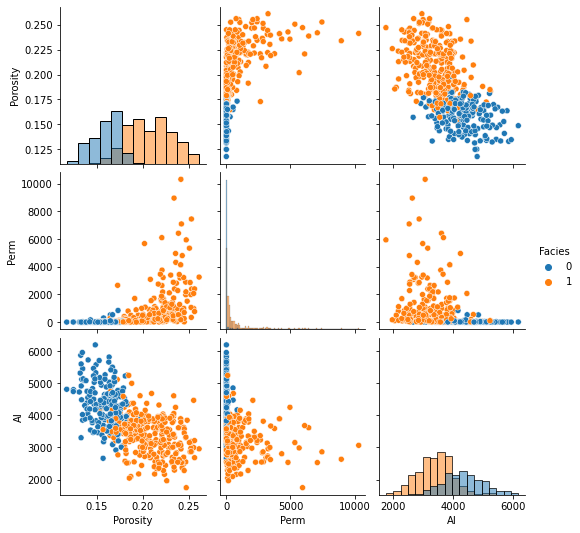

In [5]:
sns.pairplot(df,vars=['Porosity','Perm','AI'],markers='o',hue='Facies', diag_kind="hist")

### Initial Comments
From our first observations up to this point, our data fall in the physical range and adjustments won’t be required moving forward on cleaning or imputation. Additionally, observing our bivariate plots we can see that porosity and AI have a homoscedastic relationship between each other and both exhibits a normal distribution in both categories following LDA's stated assumptions. 

However, if we look at permeability, we can see a heteroscedastic behavior and the distribution is vastly skewed. This ultimately will hinder the validity of LDA as we going to explore later on.


### Constructing LDA
We'll start off by using both AI and porosity for this section, and test the performance of LDA. Let's visualize our problem before we move on.

<AxesSubplot:xlabel='Porosity', ylabel='AI'>

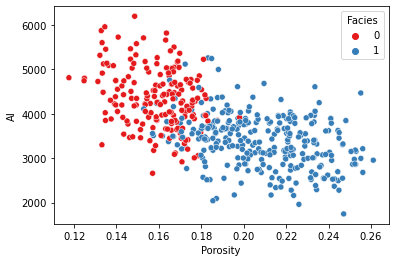

In [6]:
sns.scatterplot(x = 'Porosity', y = 'AI', hue='Facies',data=df,legend='full',palette = "Set1")

### Training, Testing split
For this example, we utilize sklearn to provide a training and test split of **80/20** randomly. However, to keep things consistent we'll use random_state functionality to keep the randomness at bay.

In [7]:
train, test = train_test_split(df,random_state=350, test_size=0.2)

Next, we'll plot both training and testing to see if both are reasonable in a bivariate sense.

[Text(0.5, 1.0, 'Test Data')]

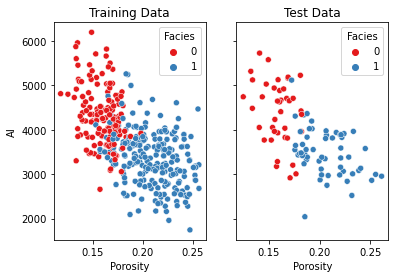

In [8]:
fig, ax =plt.subplots(1,2, sharey=True)
### plots the training data set
sns.scatterplot(x = 'Porosity', y = 'AI', hue='Facies',data=train,legend='full',palette = "Set1",ax=ax[0]).set(title='Training Data')
###Testing data set
sns.scatterplot(x = 'Porosity', y = 'AI', hue='Facies',data=test,legend='full',palette = "Set1", ax=ax[1]).set(title='Test Data')

From the initial glance, we see that testing data are reasonable and captures both categories in a smaller scale. To get a reasonable split, we can go back anytime and change the random state for fair testing if required.

Next, we'll construct our numpy arrays for both our predictor features and our response.

In [9]:
#Training array
train_X = train.loc[:,['Porosity','AI']]
train_X = train_X.reset_index(drop = True) #After the split, the indexes are retained therfore we need to rest them
#Testing array
train_y = train['Facies']
train_y = train_y.reset_index(drop = True)#After the split, the indexes are retained therfore we need to rest them
print('The training predictor features:')
print(train_X.head())
print('\nThe training response features:')
print(train_y.head())

The training predictor features:
   Porosity           AI
0  0.197393  3717.849645
1  0.197097  3268.426512
2  0.208148  3132.239192
3  0.135424  5137.618112
4  0.191574  3456.899706

The training response features:
0    1
1    1
2    1
3    0
4    1
Name: Facies, dtype: int64


The crucial step is to standardize our data set prior modeling; this will remove the influence of distance metric in the predictor feature space. 
To recall, predictor features with their original space will give false sense of space between points, which standardization deals with essentially.
\begin{equation}
z = \frac{(x-\mu)}{s}
\end{equation}

* Where $z$ is your standardized form and $s$ is your standard deviation.

In [10]:
scaler = StandardScaler()
xx = scaler.fit_transform(train_X) #Standerdizing features by removing mean
train_X['nPorosity'] = xx[:,0]
train_X['nAI'] = xx[:,1]
train_X.head()

,Porosity,AI,nPorosity,nAI
0,0.197393,3717.849645,0.226346,-0.015763
1,0.197097,3268.426512,0.217087,-0.589672
2,0.208148,3132.239192,0.563042,-0.763581
3,0.135424,5137.618112,-1.713702,1.797264
4,0.191574,3456.899706,0.044157,-0.348993


### Applying LDA 
In this section, we'll create LDA classifier and fit our data on. This will enable us to find the line that maximizes separability between two categories in the predictor feature space after projection.

Number of LDA components are corresponding to: 
\begin{equation}
p = min(n,m-1)
\end{equation}

* Where $n$ is the number of predictor features used and $m$ is number of categories. 

#### Hyperparameters Involved
Essentially, LDA is known for its closed form solution which will not require any hyperparameter tuning. However, in the function's library there're couple of solvers that can cater to the data you're handling. 
Shrinkage solvers might be used in case you're low on samples to construct your covariance matrixes. 
In our problem, the default solver LDA uses is singular value decomposition.

In [11]:
#Applying Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)  # Create an LDA classifier
x_tf = lda.fit_transform(train_X.loc[:,['nPorosity','nAI']], train_y) # Train the classifier
X_x  = lda.transform(train_X.loc[:,['nPorosity','nAI']])

After setting up our function, we'll go ahead and visualize our result.

C:\Users\oalho\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Linear Discriminant Analysis')

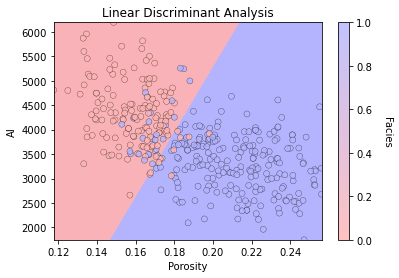

In [12]:
plt = visualize_model(lda,train_X["nPorosity"],train_X["nAI"],train_X["Porosity"],train_X["AI"],train_y)
plt.title('Linear Discriminant Analysis')

The algorithm result shows the best linear separation between facies when using porosity and AI as our predictor features. The data's original distribution are intermingled, which gives will lead to misclassification near the boundary. 

The line separated can be referred to LDA projected that has the highest eigenvalue, which as a result we we're able to separate two categories by dimensionality reduction from 2D to 1D

In a high dimensional space, this can be used effectively since the number of LDA constructed can be low compared to high dimensionality of the problem if you have low categories.

#### K-folds Cross validation
To validate our solver's behavior over all our data sets, we'll perform K-Folds Cross validation and view our estimated classification accuracy.

In [13]:
# Defining k-folds model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Model Evaluation
scores = cross_val_score(lda, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
# Accuracy
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.910 (0.050)


From the results, the model was able to achieve 91% classification accuracy, and we're confident of our solver in this case.

Next, we'll visualize our LDA and see how that data fall in the projected line.

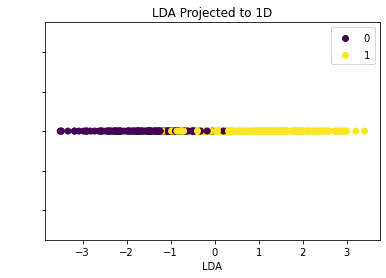

In [14]:
plt.figure()
sc = plt.scatter( x_tf, [0] * x_tf.shape[0], c= train_y, label='facies')
plt.legend(*sc.legend_elements())
plt.title('LDA Projected to 1D')
plt.xlabel('LDA')
plt.yticks(color="None")
plt.show()

### Quadratic DA Demonstration

In this section, we'll be looking at QDA which acts similar in a sense to LDA which is used as a supervised classifier. However, the added value stems from the non-linear classification. Additionally, one of LDA's assumptions were that classification covariance matrix are equal, if they're not QDA handles classification better.

Most of the process are similar in terms of steps, and we'll summarize it in one block for demonstration purposes Qc the previous problem.

We'll start off by importing QDA package and then fit and plot our results.

C:\Users\oalho\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Quadratic Discriminant Analysis')

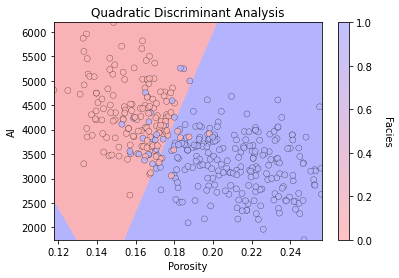

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Applying Linear Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()  # Create an LDA classifier
z_tf = qda.fit(train_X.loc[:,['nPorosity','nAI']], train_y) # Train the classifier
plt = visualize_model(qda,train_X["nPorosity"],train_X["nAI"],train_X["Porosity"],train_X["AI"],train_y)
plt.title('Quadratic Discriminant Analysis')

As we've seen, using our current data set we're not able to fully demonstrate the difference between both methods. 
Essentially, QDA behaves similarly to LDA if covariance matrixes between categories are similar.

The next section will follow sklearn's workflow that generates data sets with similar covariance vs different covariance matrices. 

This will enable us to distinguish between both classifiers clearly!
We'll start off by generating randomly samples with similar and dissimilar covariance matrices for illustration.

In [16]:
#Most of the code from this block was used from sklearn library for demonstration
# generate synthatic datasets for demonstration
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 500, 2
    np.random.seed(340)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

#Used to demonstrate the benifits of QDA
def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 500, 2
    np.random.seed(340)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y



We will have to import the necessary extra packages catered for this exercise and defining the necessary functions as well.

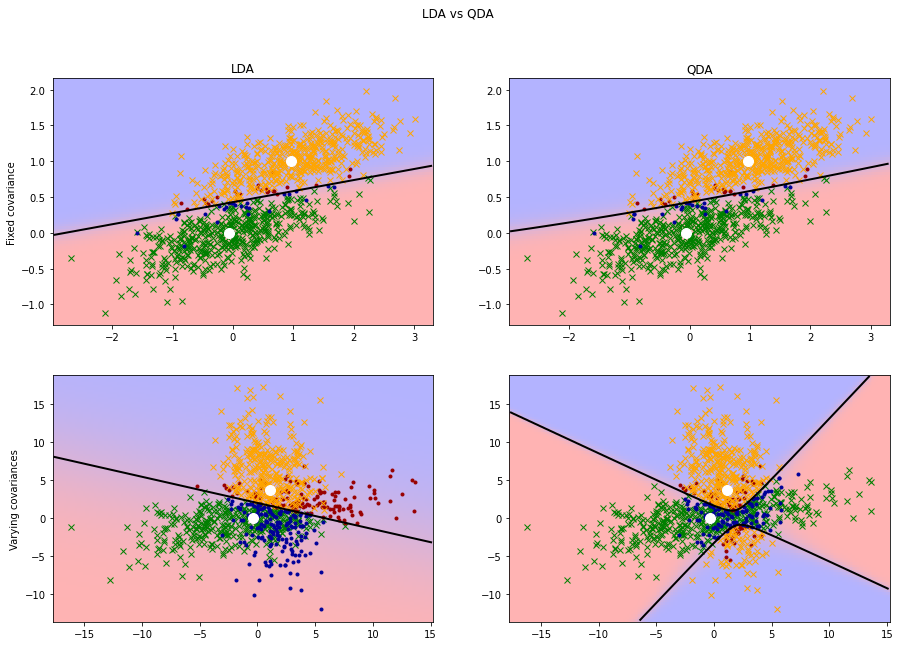

In [17]:
from scipy import linalg #To enchance algebra computations, solver
import matplotlib as mpl 

#Most of the code from this block was used from sklearn library for demonstration
#Setting Color maps
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

# Plotting function
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('LDA')
        plt.ylabel('Fixed covariance')
    elif fig_index == 2:
        plt.title('QDA')
    elif fig_index == 3:
        plt.ylabel('Varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    xmin, xmax = X[:, 0].min(), X[:, 0].max()
    ymin, ymax = X[:, 1].min(), X[:, 1].max()

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'x', color='green')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '.', color='#990000')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'x', color='orange')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '.', color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # Mean of Data generated
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='white', markersize=10)
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='white', markersize=10)

    return splot

# function for plotting boundaries between classes
def plot_ellipse(splot, mean, cov, color): 
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())
    
# Plotting
plt.figure(figsize=(15,10))
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # LDA
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plt.axis('tight')

    # QDA
    qda = QuadraticDiscriminantAnalysis()
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plt.axis('tight')
    
plt.suptitle('LDA vs QDA')
plt.show()

### General Comments on LDA vs QDA

As expected, both methods are good classifiers when the data you're dealing with is favorable to it. Several observations:
* LDA utilizes a linear projection as a way to separate classifiers. In both scenarios they're being separated by a line
* QDA can be used as a generalization method that encompasses LDA 
* Generally, LDA and QDA perform quite the same when covariance matrices are equal
* In the second data set, QDA performs better since the condition imposed was varying covariances, and hence performs better
* $\color{red}{\text{Red}}$ and $\color{blue}{\text{Blue}}$ dots represents misclassified data points between categories
* White dots represents the mean of the data set

### Othman A. Al Homidi, Graduate student, University of Texas at Austin

Graduated from LSU back 2016 in petroleum engineering, and worked in the industry for 5 years. Gained massive experience working on various positions from reservoir management, production and reservoir description. Returned to peruse his higher education in university of Texas at Austin to enhance his capabilities and add more to the industry in the feature.

I hope you've found this useful,

Al Homidi, Othman